<a href="https://colab.research.google.com/github/juanjomar22-glitch/Juan.Marquez/blob/main/Caracterizacion_VA_Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Caso de estudio**

En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos asociados a las operaciones del negocio de la naviera EVERGREEN.
Esta naviera taiwanesa opera en aproximadamente 240 puertos alrededor del mundo, utilizando cerca de 150 buques que transitan, entre otras rutas, por el Canal de Panamá.

Los riesgos operacionales a los cuales está expuesta la naviera están principalmente relacionados con la logística portuaria durante los procesos de carga y descarga de contenedores. De esta manera, este riesgo operacional se describe a través de dos variables estadísticas aleatorias:

Frecuencia: indica el número de contenedores que permanecen en tierra por semana.

Severidad (KUSD): indica el costo asociado a la solución de cada evento de riesgo.

Es importante mencionar que la combinación de la frecuencia y la severidad permite obtener la distribución agregada de las pérdidas, de acuerdo con el enfoque Loss Distribution Approach (LDA). Sobre esta distribución se realizará la caracterización utilizando medidas de tendencia central (media y desviación estándar) y medidas de dispersión y forma (coeficiente de asimetría y curtosis).

In [ ]:
#Cargar las librerias de trabajo

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns #Libreria para el trabajo estadistico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los archivos de trabajo

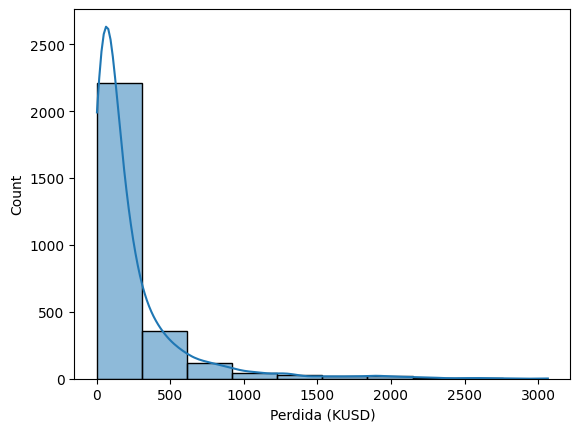

In [4]:
nxl= "/content/drive/MyDrive/Linea de enfasis/Integracion de datos y prospectiva/1. RiesgoOperacional_EVERGREEEN.xlsx"
XDB=pd.read_excel(nxl, sheet_name=0) #Llamo la hoja del archivo deseada con shhet_name=
XDB.head(10)

#procedemos con la distribucion agregada de las perdidas
freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA=freq*Sev
#Se procede con la construccion de la distribucion agregada (LDA)
plt.figure()
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel("Perdida (KUSD)")
plt.show()

In [15]:
from contextlib import suppress
np.set_printoptions(suppress=True)
NI=10 #Indica el numero de clusters
counts,bin_edges=np.histogram(LDA, bins=NI)
print("El numero de datos por intervalo es:", counts)
print("Los intervalos inferiores son:", [f"{x:.2f}" for x in bin_edges[:-1]])
print("Los intervalos superiores son:", [f"{x:.2f}" for x in bin_edges[1:]])
XC=(bin_edges[:-1]+bin_edges[1:])/2
print("Los centros de los intervalos son:", [f"{x:.2f}" for x in XC])

El numero de datos por intervalo es: [2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores son: ['2.60', '308.93', '615.26', '921.59', '1227.92', '1534.25', '1840.58', '2146.91', '2453.24', '2759.57']
Los intervalos superiores son: ['308.93', '615.26', '921.59', '1227.92', '1534.25', '1840.58', '2146.91', '2453.24', '2759.57', '3065.90']
Los centros de los intervalos son: ['155.76', '462.09', '768.42', '1074.76', '1381.09', '1687.42', '1993.75', '2300.08', '2606.41', '2912.74']


In [21]:
#Se configura la tabla
tabla=np.column_stack((bin_edges[:-1], bin_edges[1:],XC,counts))
df=pd.DataFrame(tabla,columns=['LI', 'LS', 'XC', 'ND'])
df.head(10)

,LI,LS,XC,ND
0,2.599197,308.929450,155.764324,2209.0
1,308.929450,615.259703,462.094577,356.0
2,615.259703,921.589957,768.424830,116.0
3,921.589957,1227.920210,1074.755083,46.0
4,1227.920210,1534.250463,1381.085337,27.0
5,1534.250463,1840.580717,1687.415590,18.0
6,1840.580717,2146.910970,1993.745843,20.0
7,2146.910970,2453.241223,2300.076097,7.0
8,2453.241223,2759.571476,2606.406350,4.0
9,2759.571476,3065.901730,2912.736603,1.0


####Se calculan laas metricas estadisticas de tendencia central y dispercion: Media, Desviacion, Asimetria, Curtosis

In [29]:
#La media
U=np.mean(LDA)
V=np.var(LDA)
sigma=np.std(LDA)
skewness_value = skew(LDA)
kurtosis_value = kurtosis(LDA)
T2=np.column_stack((U,V,sigma))
df2=pd.DataFrame(T2,columns=['Media', 'Varianza', 'Desviacion'])
df2['Asimetria'] = skewness_value
df2['Curtosis'] = kurtosis_value
df2.head()

,Media,Varianza,Desviacion,Asimetria,Curtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


Analisis de resultados De las metricas de tendencia central y dispersión, podems observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetria (3.3890), el cual esta por encima de la unidad, lo que indica que en general las perdidas por dejar contenedores en tierra son perdidas menores (perdidas esperadas-no asegurables). por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado izquierdo de la media de la distribución de las perdidas, tal y como se puede observar en la grafica
del histograna de frecuencias. esto refuerza la idea de menores perdias.